# Learning and Development: Regression Implementations with `scikit-learn`

Regression is a statistical method used to analyze the relationship between one dependent variable (usually denoted as Y) and one or more independent variables (usually denoted as X). It aims to predict the value of the dependent variable based on the values of the independent variables. Regression models can be linear or nonlinear, depending on the nature of the relationship between the variables. Linear regression, for example, assumes a linear relationship between the variables, while nonlinear regression allows for more complex relationships.

## Constants

In [1]:
DATASET_URL = "https://raw.githubusercontent.com/sakthisanthosh010303/ctn-datasets/main/insurance_charges.csv"
FONT_URL = "https://github.com/sakthisanthosh010303/ctn-datasets/raw/main/FreeMonoBold.ttf"

## Importing Modules

In [2]:
from matplotlib import font_manager, rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
import seaborn as sns

%matplotlib inline

In [3]:
!wget -q -O "./FreeMonoBold.ttf" {FONT_URL}

font_manager.fontManager.addfont("./FreeMonoBold.ttf")
rcParams["font.family"] = "FreeMono"

## Analysing the Dataset

Fist, let us load the data and describe some statistical parameters from the data.

In [4]:
data_frame = pd.read_csv(DATASET_URL)

In [5]:
data_frame["smoker"] = data_frame["smoker"].map(
    {"yes": 1, "no": 0}
)
data_frame["sex"] = data_frame["sex"].map(
    {"male": 1, "female": 0}
)

data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


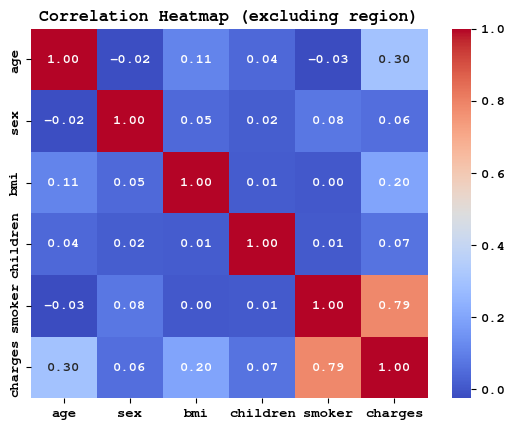

In [6]:
correlation_matrix = data_frame.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap (excluding region)")
plt.show()

### Age

From the statistics above, the minimum age is 18 and the maximum age is 64 with a window of 47 years. Hence, we can create a histogram with 47 bins and look at the distribution of age data.

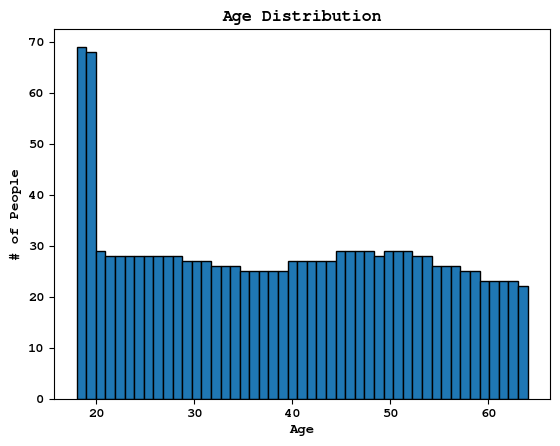

In [7]:
plt.hist(x=data_frame["age"], bins=47, edgecolor="black")

plt.title("Age Distribution")
plt.xlabel("Age"); plt.ylabel("# of People")

plt.show()

From the data above, it is clear that the ages 21-64 have 20-30 users registered for insurance premium. However, there is a spike in the ages 18 and 19. This maybe due to the reason that the insurance company is issuing insurance to customers only if they"re 18 years or above. And so, the customers are getting insured as soon as they turn 18. Another reason could be that the insurance company is offering a low insurance premium for customers for these ages.

### Body Mass Index

BMI stands for Body Mass Index. It's a measure used to assess a person's body weight relative to their height. It's calculated by dividing a person's weight in kilograms by the square of their height in meters. BMI provides a general indication of whether a person has a healthy body weight for their height, although it does not directly measure body fat percentage. It's commonly used by healthcare professionals to screen for potential weight-related health problems.

| BMI Range | Condition      |
| --------- | -------------- |
| < 18.5    | Underweight    |
| 12.5-24.9 | Normal         |
| 25-29.9   | Overweight     |
| 30-39.9   | Obesity        |
| > 40      | Morbit Obesity |

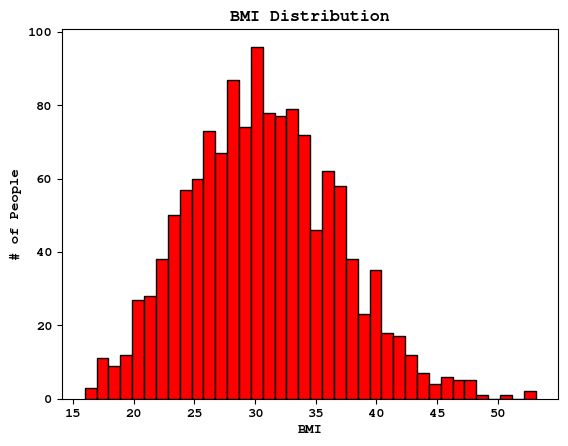

In [8]:
plt.hist(x=data_frame["bmi"], bins=38, edgecolor="black", color="red")

plt.title("BMI Distribution")
plt.xlabel("BMI"); plt.ylabel("# of People")

plt.show()

The above graph is a Gaussian distribution. A Gaussian distribution, also known as a normal distribution, is a probability distribution that is symmetric around its mean, with the majority of the data points falling close to the mean and fewer data points farther away from it. It is characterized by its bell-shaped curve. Here, most of the people have a BMI in the range 25-35.

### Charges

Charges is the output we want to predict for the given input parameters. Let us analyze the distribution of charges among customers.

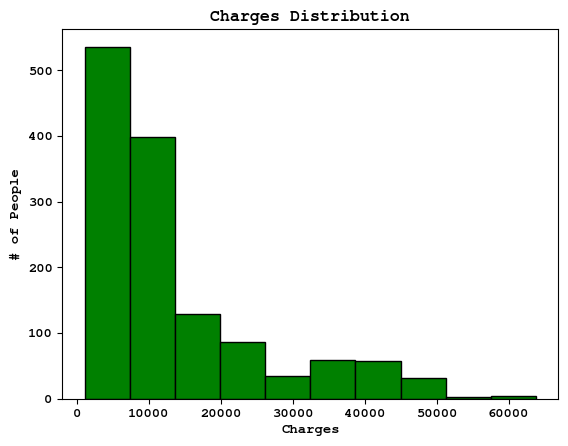

In [9]:
plt.hist(x=data_frame["charges"], edgecolor="black", color="green")

plt.title("Charges Distribution")
plt.xlabel("Charges"); plt.ylabel("# of People")

plt.show()

From the distribution, it is clear that most people pay insurance less than 15,000 dollars.

### Age vs Charges

Let us try to find the relation between age and insurance charge by plotting a scatter plot.

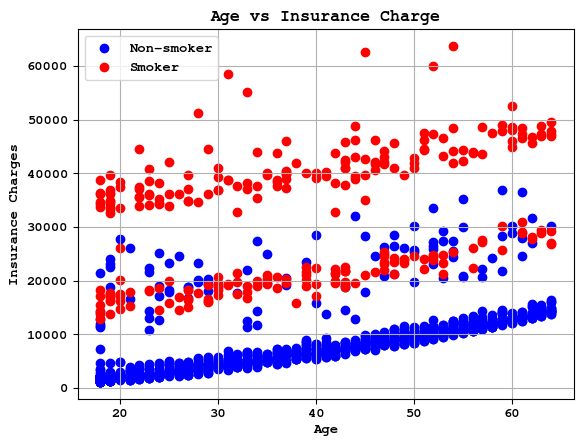

In [10]:
plt.scatter(
    x=data_frame[data_frame["smoker"] == 0]["age"],
    y=data_frame[data_frame["smoker"] == 0]["charges"],
    color="blue",
    label="Non-smoker"
)
plt.scatter(
    x=data_frame[data_frame["smoker"] == 1]["age"],
    y=data_frame[data_frame["smoker"] == 1]["charges"],
    color="red",
    label="Smoker"
)

plt.title("Age vs Insurance Charge")
plt.xlabel("Age"); plt.ylabel("Insurance Charges")

plt.legend()
plt.grid(True)
plt.show()

The general trend seems to be that the medical charges increase with age, as we might expect. However, there is a significant variation in charges for each age and it is clear that age alone cannot be used to determine the insurance charges. We can see three horizontal cluster of points from left to right stacked upon each other.

### BMI vs Charges

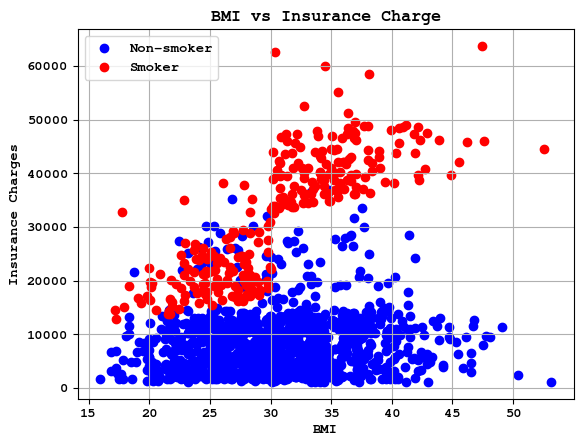

In [11]:
plt.scatter(
    x=data_frame[data_frame["smoker"] == 0]["bmi"],
    y=data_frame[data_frame["smoker"] == 0]["charges"],
    color="blue",
    label="Non-smoker"
)
plt.scatter(
    x=data_frame[data_frame["smoker"] == 1]["bmi"],
    y=data_frame[data_frame["smoker"] == 1]["charges"],
    color="red",
    label="Smoker"
)

plt.title("BMI vs Insurance Charge")
plt.xlabel("BMI"); plt.ylabel("Insurance Charges")

plt.legend()
plt.grid(True)
plt.show()

From the plot, it is clear that there is no linear relationship between people who are non-smokers and their insurance charges. However, people who smoke have strong correlation between their BMI and insurance charges.

### Smoker vs Charges

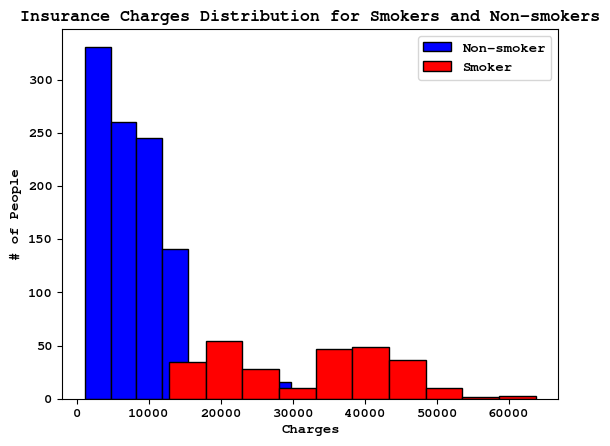

In [12]:
plt.hist(
    x=data_frame[data_frame["smoker"] == 0]["charges"],
    bins=10,
    edgecolor="black",
    color="blue",
    label="Non-smoker"
)
plt.hist(
    x=data_frame[data_frame["smoker"] == 1]["charges"],
    bins=10,
    edgecolor="black",
    color="red",
    label="Smoker"
)

plt.title("Insurance Charges Distribution for Smokers and Non-smokers")
plt.xlabel("Charges"); plt.ylabel("# of People")

plt.legend()
plt.show()

### Region vs Charges

Let's plot the relationship between region and charges and see whether we can see some relation between them. From the above graph, it is clear that people who are non-smokers pay less insurance charges than people who smoke. People who smoker have a higer risk of death and maybe, that is the dirving factor to pay more insurance charges.

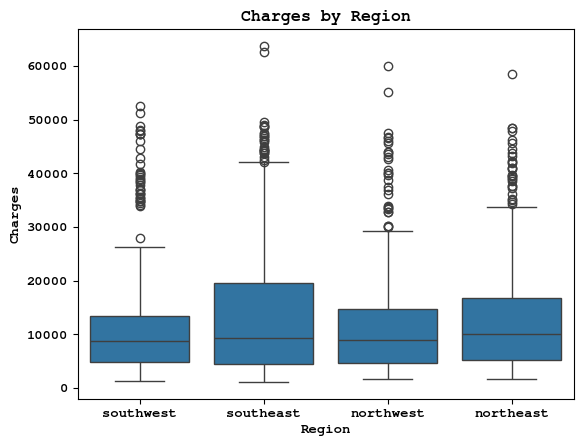

In [13]:
sns.boxplot(x="region", y="charges", data=data_frame)

plt.title("Charges by Region")
plt.xlabel("Region"); plt.ylabel("Charges")

plt.show()

### Children vs Charges

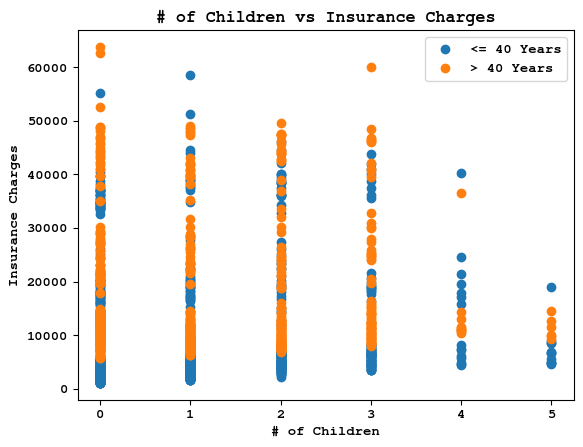

In [14]:
plt.scatter(
    x=data_frame[data_frame["age"] <= 40]["children"],
    y=data_frame[data_frame["age"] <= 40]["charges"],
    label="<= 40 Years"
)
plt.scatter(
    x=data_frame[data_frame["age"] > 40]["children"],
    y=data_frame[data_frame["age"] > 40]["charges"],
    label="> 40 Years"
)

plt.title("# of Children vs Insurance Charges")
plt.xlabel("# of Children"); plt.ylabel("Insurance Charges")

plt.legend()
plt.show()

Seeing this graph, it is clear that the minimum insurance price increases as the number of children increases. This maybe due to the fact that the customer wants to invest more to protect their family members when they're gone. However, people with no children have the maximum insurace charges (more than 60,000 dollars). This behavior cannot be understood.

## Linear Regression (single feature)

Let us create a linear regression model customers' age (who are non-smokers) and their insurance charges. This can be visualized in the graph given below.

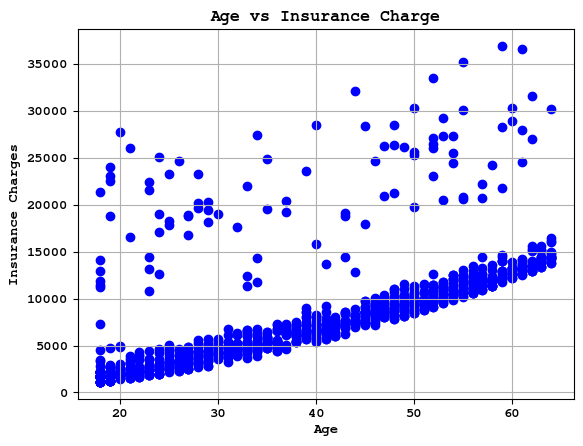

In [15]:
plt.scatter(
    x=data_frame[data_frame["smoker"] == 0]["age"],
    y=data_frame[data_frame["smoker"] == 0]["charges"],
    color="blue",
    label="Non-smoker"
)

plt.title("Age vs Insurance Charge")
plt.xlabel("Age"); plt.ylabel("Insurance Charges")

plt.grid(True)
plt.show()

Although there are many outliers, we can see a positive correlation between age and insurance charges. We'll try to fit a line and predict charges for a given age. The hypothesis for the linear regression model can be mathematically represented as follows:

$$Y = h_{\beta}(X) + \varepsilon = w(\text{age}) + b + \varepsilon \\ h_{\beta}(X) + = w(\text{age}) + b$$

The function below is a programmatical representation of the above mathematical equation. The weights and biases are determined in such a way that the loss metric is minimum. To test this method, let us assume a value for weight and bias and plot it first.

In [16]:
WEIGHT, BIAS = 240, 0

def estimate_charges(age, weight, bias):
    return age * weight + bias

In [17]:
non_smoker_ages = data_frame[data_frame["smoker"] == 0]["age"]
non_smoker_charges_observed = data_frame[data_frame["smoker"] == 0]["charges"]
non_smoker_charges_estimated = estimate_charges(
    non_smoker_ages,
    WEIGHT,
    BIAS
)

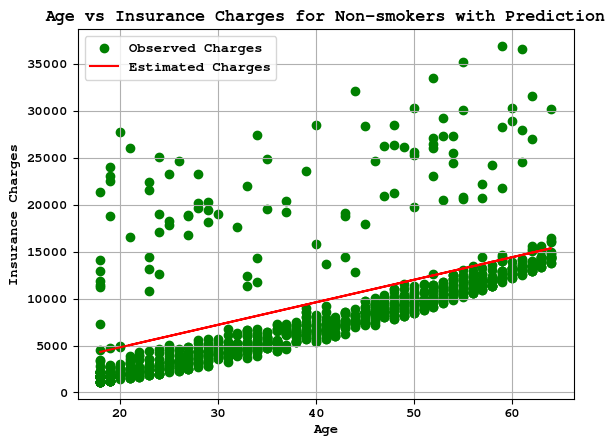

In [18]:
plt.scatter(
    x=non_smoker_ages,
    y=non_smoker_charges_observed,
    color="green",
    label="Observed Charges"
)
plt.plot(
    non_smoker_ages,
    non_smoker_charges_estimated,
    color="red",
    label="Estimated Charges"
)

plt.title("Age vs Insurance Charges for Non-smokers with Prediction")
plt.xlabel("Age"); plt.ylabel("Insurance Charges")

plt.legend()
plt.grid(True)
plt.show()

After figuring out the weight and bias with trial and error, we tried to fit a prediction line for non-smokers who are considered to be healthy and we're successful with it. However, this prediction doesn't consider the anomalies...

### Loss Function

Instead of trying to fit the data manually by trial and error method, let us define a cost function that can calculate the loss and can steer the hypothesis line to the optimum point. Let us use a RMSE loss function for this. The reason to use RMSE here is because the loss is calculated in dollars and using only MSE will return us the squared value of average loss in dollars. To prevent that, we take the root of the result to nullify the MSE effect.

$$\text{RMSE} = \sqrt{\frac{1}{2N} \sum_{i = 1}^{N} (h_{\beta}(X) - Y(X))^2}$$

The above mathematical equation can be programmatically defined as follows:

In [19]:
def lossfn_rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(predictions - targets)))

In [20]:
lossfn_rmse(non_smoker_charges_observed, non_smoker_charges_estimated)

4787.781222787101

Seen from the above value, there is an average difference of around 4,700 dollars between the estimated and observed value which is not acceptable.

### Linear Regression with `scikit-learn`

Let us use the `LinearRegression()` class provided by the `scikit-learn` package to find the best fit for the line in the plot.

In [ ]:
lr_model = LinearRegression()

help(lr_model.fit)

The `help(lr_model.fit)` will give the details such as the expected shape of input, shape of output and other parameters. The input must be a matrix of the form `(n_examples, n_features)` where `n_examples` is the list of all inputs and the `n_features` is the number of features available for the training example.

The output can be a single dimension or a multi-dimension array based on the number of output parameters to be predicted.

In [ ]:
inputs = data_frame[data_frame["smoker"] == 0][["age"]]
inputs.columns = ["non_smoker_ages"]
targets = non_smoker_charges_observed

lr_model.fit(inputs, targets)

The model has trained over the data now and has calculated the value for weights and biases so that the loss is minimum. Let us predict the charges for a particular age with the trained model now for ages 23, 35 and 43.

In [ ]:
lr_model.predict(np.array([[23], [35], [43]]))

Now, let us calculate the RMSE loss metric for the model and compare it with the loss metric of the trial and error method.

In [24]:
lr_model_predictions = lr_model.predict(inputs)

print(lossfn_rmse(non_smoker_charges_observed, lr_model_predictions))

4662.505766636395


Congratulations! 🎊 That's a pretty impressive result considering the fact that the RMSE loss for `scikit-learn` hypothesis and the trail and error hypothesis are nearly the same with a difference of only a 100 dollars. Actually, 4,000 dollars is a good loss metric because this high loss metric is caused by the outliers only and there are only minimum outliers. Let us plot the output of the trial and error model, `scikit-learn` model and the observed data to see the results graphically.

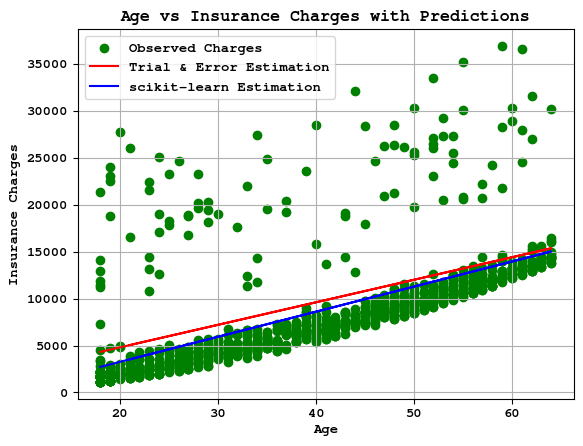

Weight(s): [267.24891283]
Bias: -2091.420556565021


In [25]:
plt.scatter(
    x=non_smoker_ages,
    y=non_smoker_charges_observed,
    color="green",
    label="Observed Charges"
)
plt.plot(
    non_smoker_ages,
    non_smoker_charges_estimated,
    color="red",
    label="Trial & Error Estimation"
)
plt.plot(
    non_smoker_ages,
    lr_model_predictions,
    color="blue",
    label="scikit-learn Estimation"
)

plt.title("Age vs Insurance Charges with Predictions")
plt.xlabel("Age"); plt.ylabel("Insurance Charges")

plt.legend()
plt.grid(True)
plt.show()

print("Weight(s):", lr_model.coef_)
print("Bias:", lr_model.intercept_)

### SDG Regression

Until now, we've used the `LinearRegression` class, which under the hood uses batch gradient descent to calculate the global minima. Let us use a regression model with sthochastic gradient descent-based model to calculate the same and compare the performance.

In [26]:
sgd_model = SGDRegressor()

sgd_model.fit(inputs, targets)

sgd_model_predictions = lr_model.predict(inputs)

print(lossfn_rmse(non_smoker_charges_observed, sgd_model_predictions))

4662.505766636395


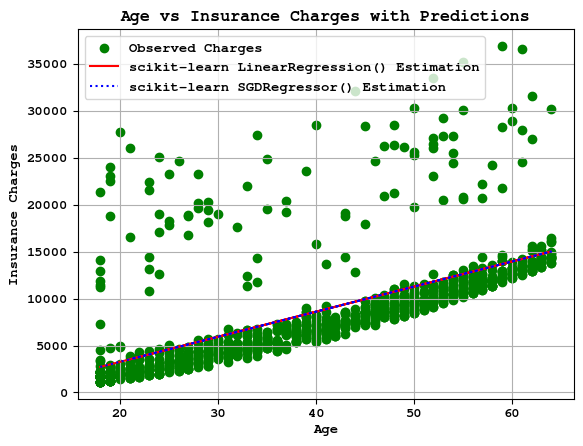

Weight(s): [327.95508779]
Bias: [-5296.43565284]


In [27]:
plt.scatter(
    x=non_smoker_ages,
    y=non_smoker_charges_observed,
    color="green",
    label="Observed Charges"
)
plt.plot(
    non_smoker_ages,
    lr_model_predictions,
    color="red",
    label="scikit-learn LinearRegression() Estimation"
)
plt.plot(
    non_smoker_ages,
    sgd_model_predictions,
    color="blue",
    linestyle="dotted",
    label="scikit-learn SGDRegressor() Estimation",
)

plt.title("Age vs Insurance Charges with Predictions")
plt.xlabel("Age"); plt.ylabel("Insurance Charges")

plt.legend()
plt.grid(True)
plt.show()

print("Weight(s):", sgd_model.coef_)
print("Bias:", sgd_model.intercept_)

As seen, there is no difference in hypothesis between the SGD and BGD (Batch Gradient Descent) models, except the fact that the weights and biases are different.

## Linear Regression (multiple features)

We've found out that there is a strong positive correlation between age and insurance charges and hence we've built a single feature linear regression model with it. We can try a multi-parameter linear regression model to better make predictions. We've seen that the `smoker` field has a strong correlation with the charges. So let's build a model with two input features: `age` and `smoker`.

Before that, we must convert non-numeric (non-metric) data to numeric data. We can do it in three ways based on the type of data.

1. **Binary Encoding**:
   - Binary encoding represents categorical data as binary numbers. Each category is assigned a unique binary representation. It's suitable for ordinal data where the order matters.
   - **Example:**
     - Categories: `low`, `medium` and `high`
     - Binary Encoding: `low` as `00`, `medium` as `01` and `high` as `11`

2. **Ordinal Encoding**:
   - Ordinal encoding assigns a unique integer value to each category. It preserves the order of the categories. It's useful for ordinal data like ratings or sizes where the significance of the data increases.
   - **Example:**
     - Categories: `small`, `medium` and `large`
     - Ordinal Encoding: `small` as `1`, `medium` as `2` and `large` as `3`

3. **One-Hot Encoding**:
   - One-hot encoding creates binary columns for each category. Each category is represented by a binary column, where only one bit is on (1) indicating the presence of that category. It's suitable for nominal data where no order is assumed.
   - Example:
     - Categories: `red`, `green` and `blue`
     - One-hot Encoding: 
       - `red` - `[1, 0, 0]`
       - `green` - `[0, 1, 0]`
       - `blue` - `[0, 0, 1]`

These encoding techniques are widely used in machine learning for handling categorical data effectively.

In [28]:
lr_model = LinearRegression().fit(data_frame[["age", "smoker"]], data_frame["charges"])
lr_model_predictions = lr_model.predict(data_frame[["age", "smoker"]])

print(lossfn_rmse(data_frame["charges"], lr_model_predictions))

6389.576957226424


The loss is higher. This is because of the fact that we're considering all smokers. Previously, we've considered only the non-smokers and hence we found a strong correlation between it and insurance charges. But now, we couldn't because the randomness of the smokers in paying insurance is too high. So what if we build two regression model, one for smoker and one for non-smoker with all the other parameters as is? If the average of loss of those two models is better, then we can say that that model performs better than this. But since we'll be using all the values for it, we must encode the region with one-hot encoding method. So, we'll be having two models with the following input features (separated by smoker and non-smoker):

1. `age`
2. `sex`
3. `southwest`
4. `northwest`
5. `northeast`
6. `southeast`
7. `bmi`
8. `children`

## Ending Notes

We've seen various techniques until now to build a linear regression model to fit a model and predict the insurance charges. To see what parameter had the most influence on the output, we can just print out the weights to see what had the most influence in predicting the output. But this is not correct in case of this dataset because the range of input for each feature is different. To avoid this, we standardize the input features so that the feature with a large range doesn't overpower the feature with relatively smaller range. It is also called normalization. With it, we can bring a feature in the range [-1, 1] with median as 0 and standard deviation as 1.

### Standardization

$$z = \frac{x - \mu}{\sigma} \quad z \in [-1, 1]$$

> **Note:** Scaling inputs by standardizing it doesn't affect the loss, meaning the loss will still be the same. However, it provides better understanding of the weights and hence we can understand easily how each weight affects the prediction.

## Approaching Machine Learning Problems

Following are the steps one must follow in approaching a machine learning problem:

1. Explore the data and find correlation between all parameters.
2. Pick the right model, loss function and optimizer for the problem.
3. Scale the numerical value and encode the data to metric value if necessary.
4. Set a part of dataset for testing purposes with the output removed.
5. Train the model with the training dataset and calculate the final loss.